There are a number of ways of running stats on your Pandas data frames.  For the R-like approach, you can use [Statsmodels](http://www.statsmodels.org/) and go very deep in to things.  Often, though, the tools baked into the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) library will give you what you need.

1) Take that same dataset used in the prior two Pandas assignments and perform a set of independent-samples t-tests, comparing the youngest group (AgeGroup = 1) to the oldest group (AgeGroup = 4) on LDI, Recognition, and RAVLT metrics.  In the end, print a summary table that lists the metric, the degrees of freedom (total count of the two sets minus two), the t-value (formatted to two decimal places) and the p-value (formatted to four decimal places).  Thus, your code should produce:

```
LDI t(45)=5.32, p=0.0000
Recog t(45)=1.76, p=0.0847
RAVLT t(45)=3.05, p=0.0038
```
Bonus points if you write a function to do the t-test and format the output that you call on 3x.

2) Plot a histogram of all the RAVLT scores and you may notice this doesn't look particularly Gaussian (normal).  This starts to get you worried that the t-test you did above isn't valid (as t-tests assume normal distributions).  Now, in truth, you should determine whether each of your young and old groups looks normal (or use a built-in test for normality), but to assuage your concerns, you decide to run the non-parametric Mann-Whitney U test on the young-vs-old RAVLT scores.  Run that test and report the results.

Not just kudos, but kleos to anyone who automates a normality test and, when it flags an issue, runs the non-parametric test instead of the t-test. (Still produce the full output for #1 if you do this.)

In [63]:
import numpy as np
import pandas as pd
from scipy import stats
from prettytable import PrettyTable
import requests 
import io 
import matplotlib.pyplot as plt

csvfname='https://raw.githubusercontent.com/celstark/n247data/main/data/StarkData.csv'

s = requests.get(csvfname).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Reminder: the CSV file is 'https://raw.githubusercontent.com/celstark/n247data/main/data/StarkData.csv'

In [2]:
'''compute 2 metrics from the data and store them in the data frame:
- LDI = pS_L - pS_F
- Recognition = pO_R - pO_F '''

data['LDI'] = data['pS_L'] -  data['pS_F']
data['Recognition'] = data['pO_R'] -  data['pO_F']

In [20]:
'''Take that same dataset used in the prior two Pandas assignments and perform a set of independent-samples t-tests, 
comparing the youngest group (AgeGroup = 1) to the oldest group (AgeGroup = 4) on LDI, Recognition, and RAVLT metrics.
 In the end, print a summary table that lists the metric, the degrees of freedom (total count of the two sets minus two), 
the t-value (formatted to two decimal places) and the p-value (formatted to four decimal places). '''

age_grp=data.groupby('AgeGroup')
youngest=age_grp.get_group(1).copy()
oldest=age_grp.get_group(4).copy()

ldi_stats = stats.ttest_ind(youngest['LDI'], oldest['LDI'])
ravlt_stats = stats.ttest_ind(youngest['RAVLT'], oldest['RAVLT'])
recog_stats = stats.ttest_ind(youngest['Recognition'], oldest['Recognition'])



In [52]:
#create pretty summary table
data = [['LDI', f't({round(ldi_stats.df)})={ldi_stats.statistic.round(2)}', ldi_stats.pvalue.round(4)],
        ['Recognition', f't({round(recog_stats.df)})={recog_stats.statistic.round(2)}', recog_stats.pvalue.round(4)],
        ['RAVLT', f't({round(ravlt_stats.df)})={ravlt_stats.statistic.round(2)}', ravlt_stats.pvalue.round(4)]]

headers = ['metric', 'statistic', 'p value']

table = PrettyTable(headers)
for row in data:
    table.add_row(row)

table.align['metric'] = 'l' 
table.padding_width = 1 
print(table)

+-------------+------------+---------+
| metric      | statistic  | p value |
+-------------+------------+---------+
| LDI         | t(45)=5.32 |   0.0   |
| Recognition | t(45)=1.76 |  0.0847 |
| RAVLT       | t(45)=3.05 |  0.0038 |
+-------------+------------+---------+


(array([ 4.,  1.,  4.,  9.,  7., 10., 13., 15., 11., 24.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 <BarContainer object of 10 artists>)

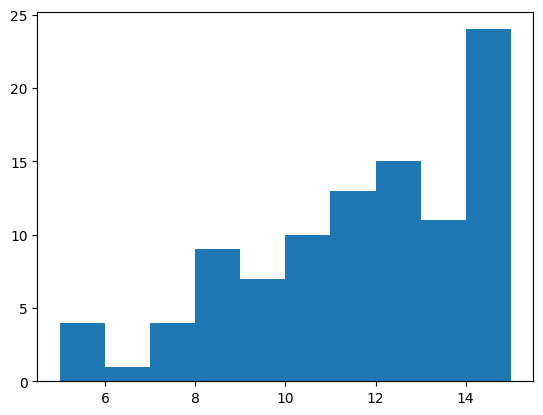

In [64]:
#plot histogram of all RAVLT scores 
plt.hist(data['RAVLT'])

In [66]:
#run the non-parametric Mann-Whitney U test on the young-vs-old RAVLT scores
stats.mannwhitneyu(youngest['RAVLT'], oldest['RAVLT'])

#format results 
data = [['RAVLT', ravlt_stats.statistic.round(2), ravlt_stats.pvalue.round(4)]]

headers = ['metric', 'statistic', 'p value']

table = PrettyTable(headers)
for row in data:
    table.add_row(row)

table.align['metric'] = 'l' 
table.padding_width = 1 
print(table)

+--------+-----------+---------+
| metric | statistic | p value |
+--------+-----------+---------+
| RAVLT  |    3.05   |  0.0038 |
+--------+-----------+---------+
